# Notebook for computing the anchors to each of the classes in the datasaet.
We will calculate by K-Means the optimal anchors to each class

In [1]:
# IMPORTS

import random
import argparse
import numpy as np
import json
import utils 
import os

In [25]:
# Configuration

data_root = os.path.join("..", "DATA", "TRAIN_DATA")
current_class = "SMD_SIMPLE_DEVICE"

data_root_tmp = os.path.join(data_root, current_class)
path_train_imgs = os.path.join(data_root_tmp, "process_tmp_folder" ,"images_slice")
path_train_annot = os.path.join(data_root_tmp, "process_tmp_folder", "labels_slice")

input_size = 416
labels = [current_class]
num_anchors = 12
num_executions = 150


# Automated Proposed anchors

best_avg_iou = 0

for i in range(num_executions):
    centroids, annot_dim, avg_iou = utils.gen_anchors(path_train_imgs,path_train_annot,input_size,labels,num_anchors)

    if best_avg_iou < avg_iou:

        best_avg_iou = avg_iou
        best_centroids = centroids
        best_annot_dim = annot_dim

        print("Best results on ", i, " score: ", '%0.2f' % avg_iou)
        utils.print_anchors(centroids)

In [26]:
best_centroids, best_annot_dim, best_avg_iou = utils.gen_anchors(
    path_train_imgs,
    path_train_annot,
    input_size,labels,
    num_anchors, 
    num_executions,
    verbose = True)



Best results on  0  score:  0.861
Distance : 56.49581282877211
anchors: [[0.00,0.00], [0.00,0.00], [11.95,25.19], [17.79,35.75], [19.00,28.12], [21.35,35.35], [24.54,12.00], [34.60,64.19], [37.12,21.73], [50.10,88.46], [85.42,48.27], [152.66,114.00]]
Best results on  2  score:  0.872
Distance : 58.56552616835899
anchors: [[11.96,25.20], [19.20,34.45], [29.33,44.76], [29.81,16.07], [35.87,69.15], [47.06,108.60], [48.12,79.96], [50.93,89.00], [63.52,33.87], [87.17,47.32], [96.44,66.16], [154.34,122.12]]
Best results on  5  score:  0.890
Distance : 51.5671255658651
anchors: [[0.00,0.00], [0.00,0.00], [11.96,25.20], [19.21,34.48], [24.45,11.99], [34.03,39.90], [34.32,19.47], [35.92,69.17], [50.14,88.50], [70.52,35.80], [87.25,47.60], [111.22,80.09]]
Best results on  62  score:  0.903
Distance : 48.496011646809784
anchors: [[0.00,0.00], [11.96,25.20], [19.20,34.45], [24.45,11.99], [29.26,44.88], [34.22,19.45], [35.92,69.17], [45.64,28.85], [50.14,88.50], [72.53,36.31], [87.16,47.68], [111.2

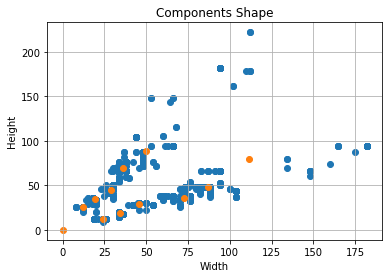

In [27]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.set_xlabel(r'Width', fontsize=10)
ax.set_ylabel(r'Height', fontsize=10)
ax.set_title('Components Shape')

ax.grid(True)

ax.scatter(best_annot_dim[:,0], best_annot_dim[:,1])
ax.scatter(best_centroids[:,0], best_centroids[:,1])

plt.show()

# Set Anchors and final IOU

In [28]:
scale1 = input_size / 13
print("Scale 1=%d"%scale1)
scale2 = input_size / 26
print("Scale 2=%d"%scale2)
scale3 = input_size / 52
print("Scale 3=%d"%scale3)
scale4 = input_size / 104
print("Scale 3=%d"%scale4)


Scale 1=32
Scale 2=16
Scale 3=8
Scale 3=4


In [29]:

# Anchors Definition
yolo_anchors = np.array([[12,  25], [37,   22], [22,   37],
                       [36,  75], [87,   48], [60,  110],
                       [142,80], [100, 200], [200, 110]])

print(yolo_anchors.shape)

(9, 2)


In [30]:
avg_iou = utils.avg_IOU(best_annot_dim, yolo_anchors)

print("Final score: ", '%0.2f' % avg_iou)

Final score:  0.77


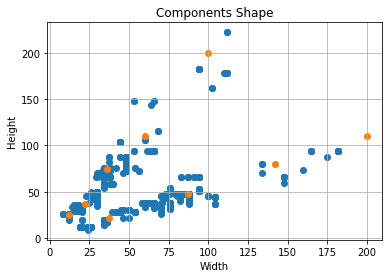

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.set_xlabel(r'Width', fontsize=10)
ax.set_ylabel(r'Height', fontsize=10)
ax.set_title('Components Shape')

ax.grid(True)

ax.scatter(best_annot_dim[:,0], best_annot_dim[:,1])
ax.scatter(yolo_anchors[:,0], yolo_anchors[:,1])


x1, y1 = [scale1, 0], [scale1, scale1]

x2, y2 = [scale2, 0], [scale2, scale2]

x3, y3 = [scale3, 0], [scale3, scale3]

#ax.plot(x1, y1, x2, y2, x3, y3,marker = 'o')

plt.show()